# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random
import matplotlib.pyplot as plt

In [2]:
content_text = '/content/drive/My Drive/SMAI_Assignment_2/Q2/ATnT/s'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [3]:
def get_flatten_img(index, img_no):
    # img = cv2.imread(content_text + "1/1.pgm")
    img = cv2.imread(f"{content_text}{index}/{img_no}.pgm")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2_imshow(img)
    nparray = np.array(img).T.flatten('F')
    # print("SIZE :",)
    return nparray.reshape(1, nparray.shape[0])
    # print(img.shape)

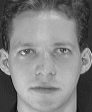

(112, 92)
(10304,)


In [4]:


img = cv2.imread(content_text + "1/1.pgm")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
print(img.shape)
img = np.array(img).flatten()
print(img.shape)

In [5]:
count=0
test_dict = {}
nparray = np.zeros(img.shape[0]+1)
x_test = np.zeros(img.shape[0]+1)

nparray = nparray.reshape(1,nparray.shape[0])
x_test = x_test.reshape(1,x_test.shape[0])

print(nparray.shape, nparray)
# np.append(nparray, values, axis=0)
guess = 10
for index in range(1, 41):
    for img_no in range(1, 11):
        # guess = random.randint(1, 10)
        guess = 1
        if(img_no != guess):
            # print(index, img_no)
            count += 1
            value = get_flatten_img(index, img_no)
            value = np.append(value, [index])
            nparray = np.insert(nparray, nparray.shape[0], value, axis=0)

    value = get_flatten_img(index, guess)
    value = np.append(value, [index])
    x_test = np.insert(x_test, x_test.shape[0], value, axis=0)

nparray = nparray[1:]
x_test = x_test[1:]

print(nparray.shape, count)
print(x_test.shape)

(1, 10305) [[0. 0. 0. ... 0. 0. 0.]]
(360, 10305) 360
(40, 10305)


In [6]:
print(nparray[1])
NPARR = nparray

[39. 44. 53. ... 26. 29.  1.]


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [7]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""


def principalComponentAnalysis(X):
    mean = np.mean(X, axis=0)
    X = X - mean
    cov = np.cov(X.T)
    eigen_value, eigen_vector = np.linalg.eigh(cov)
    # eigen_vector = eigen_vector.T
    idxs = np.argsort(eigen_value)[::-1]
    eigen_value = eigen_value[idxs]
    eigen_vector = eigen_vector[:,idxs]
    return eigen_vector
    # components = eigen_vector[:number_of_compoonents]
    # return np.dot(X, components.T)

In [8]:
eigen_vectors = principalComponentAnalysis(nparray[:, :-1])
# nparray[:,:-1].shape

In [9]:
print(eigen_vectors.shape)
nparray.shape

(10304, 10304)


(360, 10305)

In [10]:
# from sklearn.decomposition import PCA
# pca=PCA(50)
# pc_x=pca.fit(nparray)
# print(pca.components_.shape)
# pca.components_[0]

In [11]:
# number_of_compoonents = 50
# components = eigen_vectors.T[:number_of_compoonents]
# mean = np.mean(nparray, axis=0)
# # components = np.dot(np.dot(nparray, components.T), components) + mean
# # print(ans[0].shape)

In [12]:
# ans = eigen_vectors[:number_of_compoonents]

In [13]:
# components.shape

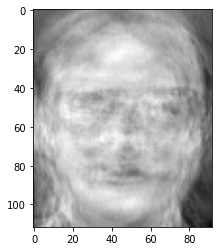

In [14]:
  number_of_compoonents = 50
  components = eigen_vectors.T[:number_of_compoonents]
  mean = np.mean(nparray[:, :-1], axis=0)
  components = np.dot(np.dot(nparray[:, :-1], components.T), components) + mean
  plt.imshow(components[0].reshape(112, 92),cmap="gray")

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [15]:
# Function to implement image reconstruction by taking arguements as necessary.
mean = np.mean(nparray[:, :-1], axis=0)

def plot_image(img, val):
    plt.imshow(img[val].reshape(112, 92),cmap="gray")

def imageReconstruction(eigen_vectors, X, number_of_compoonents):
    mean = np.mean(X[:, :-1], axis=0)
    components = eigen_vectors.T[:number_of_compoonents]
    components = np.dot(np.dot(X[:, :-1], components.T), components) + mean
    return components

  # components = eigen_vectors.T[:number_of_compoonents]
  # mean = np.mean(nparray[:, :-1], axis=0)
  # components = np.dot(np.dot(nparray[:, :-1], components.T), components) + mean
  # plt.imshow(components[0].reshape(112, 92),cmap="gray")
    # return

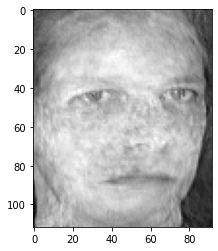

In [16]:
img = imageReconstruction(eigen_vectors, nparray, 400)
plot_image(img, 0)

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

In [17]:
y_train = (nparray[:,-1])
y_test = x_test[:, -1]

print(y_test)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]


In [18]:
# for val in range(len(y_test)):
x_test[0].shape

(10305,)

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [19]:
train_val = imageReconstruction(eigen_vectors, nparray, 50)
test_val = imageReconstruction(eigen_vectors, x_test, 50)

print(train_val.shape, test_val.shape)

(360, 10304) (40, 10304)


In [104]:
def mean_squared_error(no_of_components, nparray, x_test, y_train, y_test):
    train_val = imageReconstruction(eigen_vectors, nparray, no_of_components)
    test_val = imageReconstruction(eigen_vectors, x_test, no_of_components)
    count= 0
    ans = 0
    for val in range(len(test_val)):
        max = np.inf
        prediction = -1
        for i in range(len(train_val)):
            calc = np.square(np.linalg.norm(train_val[i] - test_val[val]))
            if(calc < max):
                max = calc
                ans = max
                prediction = y_train[i]
        
        if prediction == y_test[val]:
            count+=1
    return count/len(y_test)*100, ans

def log_mean_squared_error(no_of_components, nparray, x_test, y_train, y_test):
    train_val = imageReconstruction(eigen_vectors, nparray, no_of_components)
    test_val = imageReconstruction(eigen_vectors, x_test, no_of_components)
    count= 0
    ans = 0
    for val in range(len(test_val)):
        max = np.inf
        prediction = -1
        for i in range(len(train_val)):
            # calc = np.square(np.linalg.norm(np.log2(np.abs(train_val[i] - test_val[val]))))
            calc = np.linalg.norm(np.log2(np.abs(train_val[i] - test_val[val])))
            if(calc < max):
                max = calc
                ans = max
                prediction = y_train[i]
        
        if prediction == y_test[val]:
            count+=1
    return count/len(y_test)*100, ans

# print("ACCURACY :", count/len(y_test)*100)

In [105]:
def plot(lst1, lst2, type, method):
  # plt.plot([x1, x2], [y1, y2], 'r')
    plt.plot(lst1, lst2, '-')
    plt.xlabel("No of Vectors")
    plt.ylabel(type)
    plt.title(method)
    plt.show()

In [106]:
def imageReconstructionC(eigen_vectors, X, number_of_compoonents):
    mean = np.mean(X, axis=0)
    components = eigen_vectors.T[:number_of_compoonents]
    components = np.dot(np.dot(X, components.T), components) + mean
    return components

In [107]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model(test_img, eigen_vectors, mean_eigen_faces, nparray, y_train, no_of_components):
    train_val = imageReconstruction(eigen_vectors, nparray, no_of_components)
    test_val = imageReconstructionC(eigen_vectors, test_img, no_of_components)
    count= 0
    # for val in range(len(test_val)):
    max = np.inf
    prediction = -1
    calc = 0
    small_img = 0
    test_img = test_img.T
    for i in range(len(train_val)):
        # print(train_val[:-1][i].shape,  test_img[:-1].shape)
        # calc = np.square(np.linalg.norm(train_val[i] - test_img))
        calc = np.linalg.norm(train_val[i] - test_val)
        if(calc < max):
            small_img = train_val[i]
            max = calc
            prediction = y_train[i]
    
    # if prediction == y_test:
    #     count+=1
    return small_img, calc, prediction 

In [108]:
def predict_img(address):
    img1 = cv2.imread(address)
      # img = cv2.imread(f"{content_text}{index}/{img_no}.pgm")
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2_imshow(img1)
    test_img = np.array(img1).T.flatten('F')

    small_img, calc, prediction = model(test_img, eigen_vectors, np.mean(nparray[:, :-1], axis=0), nparray, y_train, 100)
    small_img = small_img.reshape(112, 92)
    print(f"ERROR : {calc}, PREDICTION :{prediction}")
    cv2_imshow(small_img)

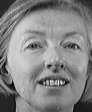

ERROR : 6447.597960621665, PREDICTION :32.0


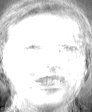

In [109]:
predict_img(content_text + "32/1.pgm")

In [110]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

'\nIterate through all the images in the test data and \ntest the accurate by taking different number of components\n'

Summarise your observations on the plots and accuracies

Accuracy increases only upto a certain range of eigen values but after that adding any vector 

[1, 10, 100, 1000, 10000]
[12.5, 95.0, 97.5, 97.5, 97.5]


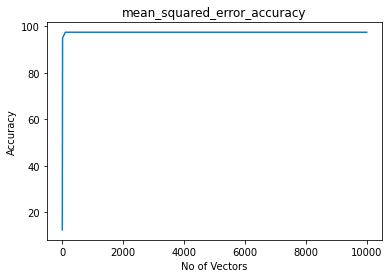

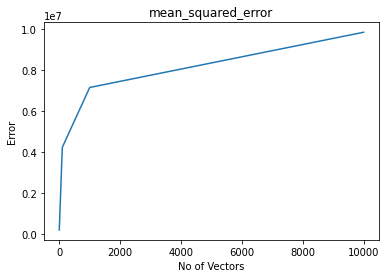

In [102]:
# Plot Number of eigenvectors vs Mean Square Error

i=1
lst1 = []
lst2 = []
lst3 = []
while(i<10001):
    lst1.append(i)
    val, ans = mean_squared_error(i, nparray, x_test, y_train, y_test)
    lst2.append(val)
    lst3.append(ans)

    i*=10
print(lst1)
print(lst2)
plot(lst1, lst2, "Accuracy", "mean_squared_error_accuracy")
plot(lst1, lst3, "Error", "mean_squared_error")


[1, 10, 100, 1000, 10000]
[12.5, 95.0, 97.5, 97.5, 100.0]


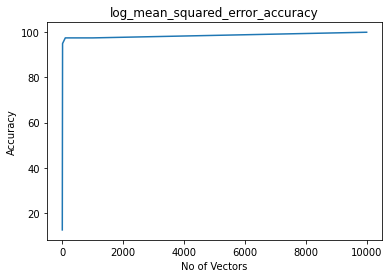

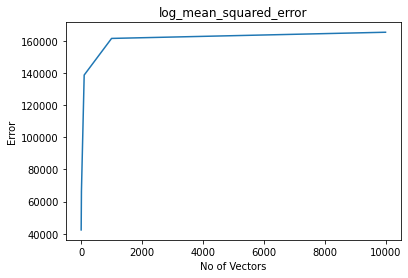

In [103]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
i=1
lst1 = []
lst2 = []
lst3 = []
while(i<10001):
    lst1.append(i)
    val, ans = log_mean_squared_error(i, nparray, x_test, y_train, y_test)
    lst2.append(val)
    lst3.append(ans)
    i*=10
print(lst1)
print(lst2)
plot(lst1, lst2, "Accuracy", "log_mean_squared_error_accuracy")
plot(lst1, lst3, "Error", "log_mean_squared_error")

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction in data analysis. PCA has several advantages and limitations:

Advantages:

1) Dimensionality Reduction: PCA can reduce the dimensionality of the data by identifying the most important features that explain most of the variance in the data hence reducing and hence increasing the speed.

2) Data Visualization: PCA can help in visualizing high-dimensional data in a lower dimensional space.

3) Computational Efficiency: PCA can make computations more efficient by reducing the size of the data.


Limitations:

Linearity: PCA assumes that the relationships between the variables in the data are linear, which may not be true in many real-world datasets, PCA can result in loss of some information from the data, especially if the retained principal components do not explain enough of the variance, The principal components extracted by PCA are often difficult to interpret in real-world contexts,PCA is sensitive to outliers in the data and may not be able to handle them effectively.


LIMITATION WRT to eigenfaces:

In the context of face recognition, PCA has some additional limitations:

PCA may not be effective in handling variations in lighting conditions and facial expressions so i applied grayscale to counter lightning conditions, which can reduce the affect of surroundings. It may not be able to handle complex facial features and patterns that are critical for accurate face recognition.It may also vary with the sensitivity to variations in the pose and orientation of the face, which can affect the quality of the features extracted by PCA. Also it may not be able to capture the unique characteristics of each individual face, leading to reduced accuracy in identifying individuals.